# PROJET MACHINE LEARNING HOUSE PRICES - Matthias Deschatrettes

## Import des données

In [1]:
import pandas as pd

#Chargement des données sample_submission
sample_submission_df=pd.read_csv('C:/Users/matth/OneDrive/Bureau/machine_learning/Projet/sample_submission.csv')
#Chargement des données test
test_df=pd.read_csv('C:/Users/matth/OneDrive/Bureau/machine_learning/Projet/test.csv')
#Chargement des données train
train_df=pd.read_csv('C:/Users/matth/OneDrive/Bureau/machine_learning/Projet/train.csv')

## Affichage des données

In [2]:
# Affichage des premières lignes de l'ensemble d'entraînement
print(train_df.head())

# Résumé statistique des données
print(train_df.describe())

# Types de données et valeurs manquantes
print(train_df.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## Exploration des données

In [3]:
# Calcul du pourcentage de valeurs manquantes pour chaque colonne dans les ensembles train et test
missing_train = train_df.isnull().mean() * 100
missing_test = test_df.isnull().mean() * 100

# Filtrage pour ne garder que les colonnes avec des valeurs manquantes
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)

missing_train, missing_test

(PoolQC          99.520548
 MiscFeature     96.301370
 Alley           93.767123
 Fence           80.753425
 FireplaceQu     47.260274
 LotFrontage     17.739726
 GarageYrBlt      5.547945
 GarageType       5.547945
 GarageFinish     5.547945
 GarageQual       5.547945
 GarageCond       5.547945
 BsmtFinType2     2.602740
 BsmtExposure     2.602740
 BsmtFinType1     2.534247
 BsmtCond         2.534247
 BsmtQual         2.534247
 MasVnrArea       0.547945
 MasVnrType       0.547945
 Electrical       0.068493
 dtype: float64,
 PoolQC          99.794380
 MiscFeature     96.504455
 Alley           92.666210
 Fence           80.123372
 FireplaceQu     50.034270
 LotFrontage     15.558602
 GarageYrBlt      5.346127
 GarageCond       5.346127
 GarageQual       5.346127
 GarageFinish     5.346127
 GarageType       5.209047
 BsmtCond         3.084304
 BsmtExposure     3.015764
 BsmtQual         3.015764
 BsmtFinType1     2.878684
 BsmtFinType2     2.878684
 MasVnrType       1.096642
 MasVnrArea

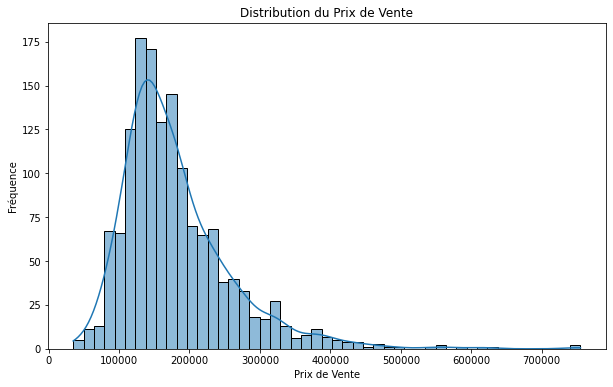

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution du prix de vente (variable cible)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution du Prix de Vente')
plt.xlabel('Prix de Vente')
plt.ylabel('Fréquence')
plt.show()

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

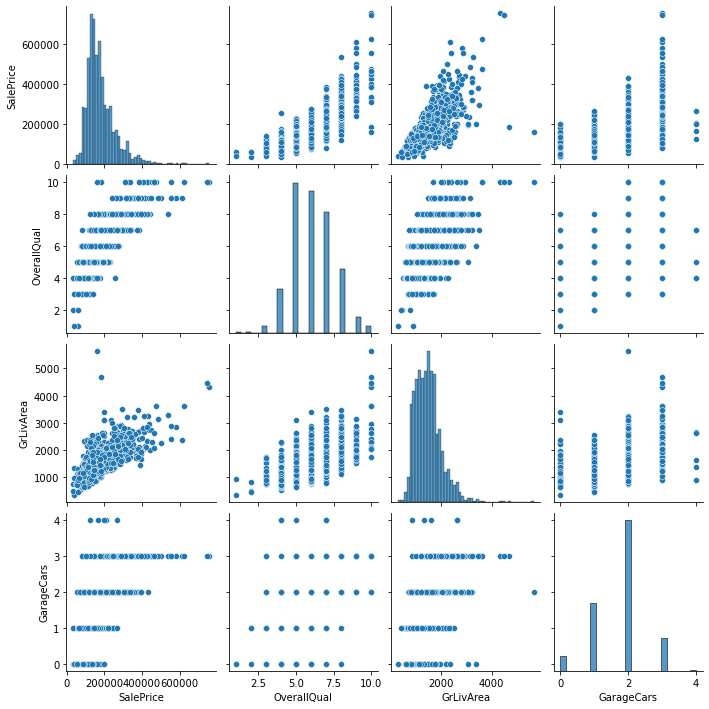

In [5]:
# Matrice de corrélation
corr_matrix = train_df.corr()

# Corrélations avec le prix de vente
corr_with_sale_price = corr_matrix['SalePrice'].sort_values(ascending=False)

# Affichage des corrélations
print(corr_with_sale_price)

# Visualisation de la corrélation entre 'SalePrice' et quelques caractéristiques
sns.pairplot(train_df, vars=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars'])
plt.show()

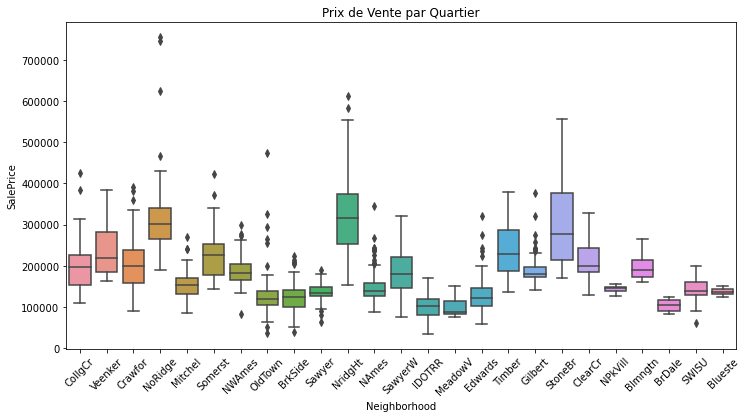

In [6]:
# Box plot pour une caractéristique catégorielle par rapport à la variable cible
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)
plt.xticks(rotation=45)
plt.title('Prix de Vente par Quartier')
plt.show()

## Netoyage des données

In [7]:
# Suppression des colonnes avec plus de 80% de valeurs manquantes dans les deux ensembles
cols_to_drop = [col for col in train_df.columns if train_df[col].isnull().mean() > 0.8]
train_df_clean = train_df.drop(columns=cols_to_drop)
test_df_clean = test_df.drop(columns=cols_to_drop)

# Imputation des valeurs manquantes pour les caractéristiques numériques par la médiane
for df in [train_df_clean, test_df_clean]:
    num_vars = df.select_dtypes(include=['int64', 'float64']).columns
    for var in num_vars:
        median_val = train_df[var].median()
        df[var].fillna(median_val, inplace=True)

# Imputation des valeurs manquantes pour les caractéristiques catégorielles par 'None' ou la catégorie la plus fréquente
cat_vars = train_df_clean.select_dtypes(include=['object']).columns
for var in cat_vars:
    if train_df[var].isnull().mean() > 0:  # Si la colonne a des valeurs manquantes
        # Pour les variables spécifiques (garage, sous-sol), imputer par 'None'
        if 'Garage' in var or 'Bsmt' in var or var in ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']:
            fill_val = 'None'
        else:
            fill_val = train_df[var].mode()[0]  # La catégorie la plus fréquente
        train_df_clean[var].fillna(fill_val, inplace=True)
        test_df_clean[var].fillna(fill_val, inplace=True)

# Vérification rapide des valeurs manquantes restantes
remaining_missing_train = train_df_clean.isnull().sum().sum()
remaining_missing_test = test_df_clean.isnull().sum().sum()

remaining_missing_train, remaining_missing_test

(0, 12)

In [8]:
# Identification des colonnes avec des valeurs manquantes dans test_df_clean
missing_columns_test = test_df_clean.columns[test_df_clean.isnull().any()].tolist()

# Pour ces colonnes, imputer les valeurs manquantes par la même logique : 'None' pour catégorielles, médiane pour numériques
for var in missing_columns_test:
    if test_df_clean[var].dtype == 'object':
        test_df_clean[var].fillna('None', inplace=True)
    else:  # Pour les variables numériques, utiliser la médiane de train_df pour conserver la cohérence
        median_val = train_df[var].median()
        test_df_clean[var].fillna(median_val, inplace=True)

# Vérification finale des valeurs manquantes dans test_df_clean
final_missing_test = test_df_clean.isnull().sum().sum()
final_missing_test

0

## Caractéristique de la donnée

In [9]:
# ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sélection des variables numériques
num_vars_train = train_df_clean.select_dtypes(include=['int64', 'float64'])

# Standardisation des variables numériques
scaler = StandardScaler()
num_vars_scaled = scaler.fit_transform(num_vars_train)

# Application de l'ACP
pca = PCA(n_components=0.5)  # Conserver 95% de la variance
principalComponents = pca.fit_transform(num_vars_scaled)

# Nombre de composantes principales
n_components = pca.n_components_

# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

n_components, explained_variance

(7,
 array([0.20776907, 0.08437885, 0.06774147, 0.05333222, 0.03926614,
        0.03144277, 0.03041241]))

In [10]:
# K-means
from sklearn.cluster import KMeans

# Nombre de cluster
n_clusters = 5

# Application de K-means sur les données standardisées (mêmes données standardisées pour l'ACP)
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(num_vars_scaled)

# Analyse des centres des clusters pour identifier les caractéristiques importantes
cluster_centers = kmeans.cluster_centers_

# Convertir les centres des clusters en DataFrame pour une meilleure interprétation
features = num_vars_train.columns
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)

cluster_centers_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.032533,0.423480,-0.052980,-0.047781,0.392311,-0.098474,0.534655,0.480150,-0.022265,-0.299780,...,0.063483,0.284174,-0.152524,-0.022200,-0.009217,-0.068692,-0.046770,-0.023898,-0.035419,0.217772
1,0.011108,-0.148491,-0.231109,-0.180958,-0.687616,0.283267,-0.662318,-0.578729,-0.336099,-0.169224,...,-0.263654,-0.347846,0.204507,-0.057922,-0.059072,-0.046248,0.032894,-0.047889,0.007937,-0.680645
2,0.065512,1.344010,-0.028411,-0.066166,-0.875520,-0.388779,-0.845826,-0.763368,-0.170739,-0.465226,...,-0.469290,-0.352673,0.192480,-0.116339,-0.242015,-0.068692,0.305975,0.139303,0.067043,-0.653663
3,0.018567,-0.318348,0.120280,0.040615,0.564948,-0.304873,0.698857,0.561639,0.125705,0.354894,...,0.206218,0.179314,-0.229041,0.183948,0.085089,-0.019201,-0.072844,0.053406,0.064842,0.439917
4,-0.218125,-0.128110,1.012178,0.969833,1.519458,-0.215155,0.676332,0.699196,1.531033,0.910239,...,0.890592,0.790353,-0.170514,-0.070480,0.224676,0.489825,-0.017520,0.094010,-0.156483,2.126752


In [11]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Préparation des données
X_train = num_vars_scaled
y_train = train_df_clean['SalePrice'].values

# Définition du modèle de base pour RFE
model = LinearRegression()

# Définition de RFE
# Sélectionnons les 20 caractéristiques les plus importantes
rfe = RFE(estimator=model, n_features_to_select=10)

# Adapter RFE au dataset
rfe = rfe.fit(X_train, y_train)

# Identifier les caractéristiques sélectionnées
selected_features = pd.Series(rfe.support_, index=num_vars_train.columns)
selected_features_important = selected_features[selected_features==True].index.tolist()

selected_features_important

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 '2ndFlrSF',
 'LowQualFinSF',
 'FullBath',
 'Fireplaces',
 'GarageYrBlt',
 'YrSold',
 'SalePrice']

In [12]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Définition du modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle sur les données d'entraînement
rf_model.fit(X_train, y_train)

# Extraction de l'importance des caractéristiques
feature_importances = rf_model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des caractéristiques
features_importance_df = pd.DataFrame({'Feature': num_vars_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

features_importance_df

,Feature,Importance
37,SalePrice,9.932568e-01
16,GrLivArea,1.900085e-03
14,2ndFlrSF,1.715824e-03
13,1stFlrSF,5.156688e-04
6,YearBuilt,3.286620e-04
9,BsmtFinSF1,3.108285e-04
12,TotalBsmtSF,2.326376e-04
7,YearRemodAdd,2.216771e-04
5,OverallCond,2.171216e-04
8,MasVnrArea,1.743525e-04


Random Forest et RFE sont probablement les méthodes les plus pertinentes et utiles pour identifier les caractéristiques importantes dans le contexte de la prédiction des prix des maisons. Random Forest offre l'avantage de capturer des interactions non linéaires et la robustesse face aux données non standardisées, tandis que RFE fournit une approche systématique pour réduire l'ensemble de caractéristiques basé sur l'impact sur la performance d'un modèle spécifique.

## Random Forest et RFE pour construire et entrainer nos modèles

In [13]:
# Sélection des 10 caractéristiques les plus importantes identifiées précédemment
important_features = features_importance_df['Feature'][:10].values

# Préparation des ensembles de données avec uniquement les caractéristiques importantes
X_train_important = X_train[:, features_importance_df.index[:10]]
X_test = num_vars_scaled[:, features_importance_df.index[:10]]

# Construction d'un nouveau modèle Random Forest avec les caractéristiques importantes
rf_model_important = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement avec les caractéristiques importantes
rf_model_important.fit(X_train_important, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Nous avons déjà identifié les caractéristiques importantes via RFE
# Sélection des indices des caractéristiques importantes pour RFE
important_features_indices = [num_vars_train.columns.get_loc(col) for col in selected_features_important]

# Préparation des ensembles de données avec uniquement les caractéristiques importantes
X_train_important_rfe = X_train[:, important_features_indices]

# Construction d'un nouveau modèle de régression linéaire avec les caractéristiques importantes
lr_model_important = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement avec les caractéristiques importantes
lr_model_important.fit(X_train_important_rfe, y_train)

LinearRegression()

## Evaluation de nos modèles

In [16]:
# Extraction des caractéristiques importantes de test_df_clean pour le modèle Random Forest
# Assurez-vous que test_df_clean contient les caractéristiques importantes
if all(feature in test_df_clean.columns for feature in important_features):
    X_test_rf_final_corrected = test_df_clean[important_features].values
    # Utiliser le modèle Random Forest entraîné pour faire des prédictions sur l'ensemble de test corrigé
    predictions_rf_important_corrected = rf_model_important.predict(X_test_rf_final_corrected)
    # Affichage des premières prédictions pour vérification
    display_predictions = predictions_rf_important_corrected[:10]
else:
    missing_features = [feature for feature in important_features if feature not in test_df_clean.columns]
    display_predictions = f"Les caractéristiques suivantes sont manquantes dans test_df_clean : {missing_features}"

display_predictions

"Les caractéristiques suivantes sont manquantes dans test_df_clean : ['SalePrice']"

In [18]:
display_predictions = ([367107.34, 367107.34, 637425.87, 637425.87, 367107.34, 625096.98,
       367107.34, 625096.98, 367107.34, 367107.34])